In [1]:
%reload_ext autoreload
%autoreload 2

import os, psutil
os.environ['NUMEXPR_MAX_THREADS'] = '20'
import logging
from alphadia.extraction import processlogger


import neptune.new as neptune

from alphabase.spectral_library.base import SpecLibBase
from alphadia.extraction.planning import Plan

try:
    neptune_token = os.environ['NEPTUNE_TOKEN']
except KeyError:
    logging.warning('NEPTUNE_TOKEN environtment variable not set')
    neptune_token = None


0:00:00.933947  INFO: Cupy is not available
0:00:01.483616  WARNING: NEPTUNE_TOKEN environtment variable not set


In [2]:
from alphatims import bruker

bruker.TimsTOF('/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/diaPASEF_vs_synchroPASEF/20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min_IM0713_diaPASEF_S4-A1_1_500.d')

0:00:01.545627  INFO: Importing data from /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/diaPASEF_vs_synchroPASEF/20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min_IM0713_diaPASEF_S4-A1_1_500.d
0:00:01.546191  INFO: Using .d import for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/diaPASEF_vs_synchroPASEF/20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min_IM0713_diaPASEF_S4-A1_1_500.d
0:00:01.546536  INFO: Reading frame metadata for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/diaPASEF_vs_synchroPASEF/20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min_IM0713_diaPASEF_S4-A1_1_500.d
0:00:01.646929  INFO: Reading 11,812 frames with 1,449,841,416 detector events for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/diaPASEF_vs_synchroPASEF/20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min_IM0713_diaPASEF_S4-A1_1_500.d
100%|██████████| 11812/11812 [00:05<00:00, 2154.55it/s]
0:00:07.182808  INFO: Indexing /Users/georgwallmann/

In [3]:
import alphadia.extraction.scoring
help(alphadia.extraction.scoring._executor)

Help on function _executor in module alphadia.extraction.scoring:

_executor(i, candidate_container, jit_data, fragment_container, quadrupole_calibration, precursor_mz_tolerance, fragment_mz_tolerance, debug)



In [4]:

# spectral library location
# requires an alphabase spectral library with decoys
lib_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/libraries/library_MSFragger.hdf'

# output location
# a file called alpha psm will be written to this location
output_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_02_12_diaPASEF_vs_synchroPASEF'

raw_files = ['/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/diaPASEF_vs_synchroPASEF/20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min_IM0713_diaPASEF_S4-A1_1_500.d']

processlogger.init_logging(output_location)

In [5]:
test_lib = SpecLibBase()
test_lib.load_hdf(lib_location, load_mod_seq=True)



0:00:00.491199  PROGRESS:       _   _      _         ___ ___   _   
0:00:00.491831  PROGRESS:      /_\ | |_ __| |_  __ _|   \_ _| /_\  
0:00:00.492201  PROGRESS:     / _ \| | '_ \ ' \/ _` | |) | | / _ \ 
0:00:00.492459  PROGRESS:    /_/ \_\_| .__/_||_\__,_|___/___/_/ \_\
0:00:00.492731  PROGRESS:            |_|                            
0:00:00.492983  PROGRESS: 
0:00:00.493459  INFO: loading default config from /Users/georgwallmann/Documents/git/alphadia/alphadia/extraction/../../misc/config/default.yaml
0:00:00.498587  PROGRESS: version: alpha_1.0
0:00:00.499090  PROGRESS: hostname: Georgs-MacBook-Pro.local
0:00:00.499595  PROGRESS: date: 2023-02-21 11:50:12
0:00:02.656908  INFO: renaming precursor_columns columns
0:00:02.657904  INFO: renaming fragment_columns columns
0:00:02.658320  INFO: ========= Library Stats =========
0:00:02.658566  INFO: Number of precursors: 104,110
0:00:02.672018  INFO: 	thereof targets:52,792
0:00:02.672541  INFO: 	thereof decoys: 51,318
0:00:02.673891  

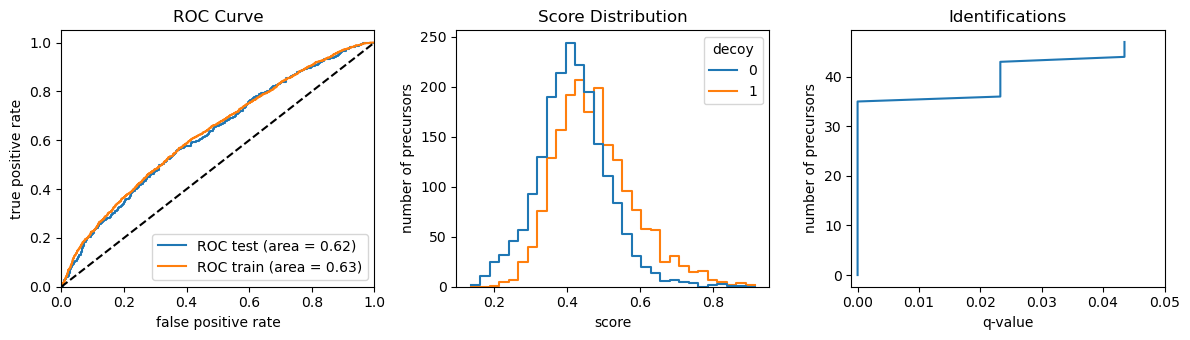

0:01:15.033666  PROGRESS: === checking if recalibration conditions were reached, target 100 precursors ===
0:01:15.034925  PROGRESS: Accumulated precursors: 3,844, 0.01 FDR: 36, 0.001 FDR: 36
0:01:15.035328  PROGRESS: === Epoch 0, step 1, extracting elution groups 2000 to 4000 ===
0:01:15.037647  PROGRESS: MS1 error: 120, MS2 error: 120, RT error: 360, Mobility error: 0.04
0:01:15.038303  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
0:01:15.038741  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:01:15.039148  INFO: Expected peak length in RT is 8.00 seconds, sigma is 0.96
0:01:15.039498  INFO: Expected peak length in mobility is 0.02 1/K_0, sigma is 5.16
100%|██████████| 1983/1983 [00:11<00:00, 173.52it/s]
0:01:26.703107  INFO: Extracted candidates for 1983 target precursors (100.00%)
0:01:26.703473  INFO: Extracted candidates for 1958 decoy precursors  (100.00%)
100%|██████████| 7882/7882 [00:00<00:00, 12714.67it/s]
0:01:32.251960  INFO: Scored 78

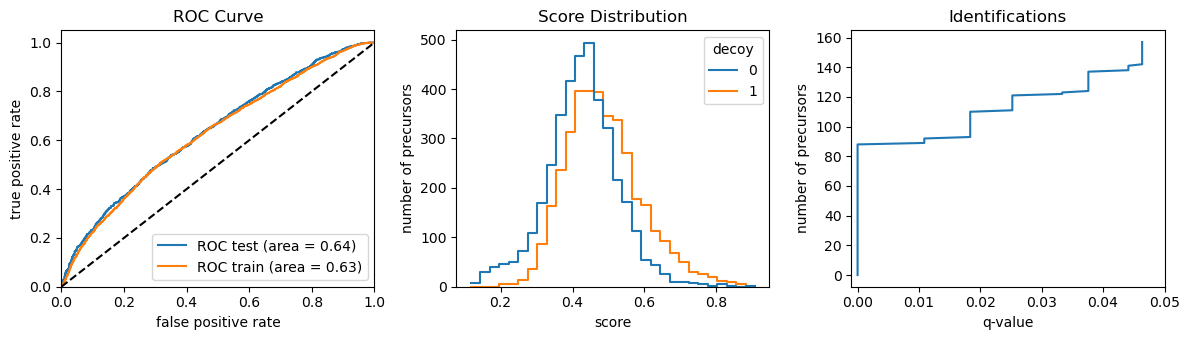

0:01:32.505220  PROGRESS: === checking if recalibration conditions were reached, target 100 precursors ===
0:01:32.505649  PROGRESS: Accumulated precursors: 7,633, 0.01 FDR: 89, 0.001 FDR: 89
0:01:32.505847  PROGRESS: === Epoch 0, step 2, extracting elution groups 4000 to 6000 ===
0:01:32.508395  PROGRESS: MS1 error: 120, MS2 error: 120, RT error: 360, Mobility error: 0.04
0:01:32.508948  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
0:01:32.509383  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:01:32.509837  INFO: Expected peak length in RT is 8.00 seconds, sigma is 0.96
0:01:32.510148  INFO: Expected peak length in mobility is 0.02 1/K_0, sigma is 5.16
100%|██████████| 1986/1986 [00:11<00:00, 178.19it/s]
0:01:43.895558  INFO: Extracted candidates for 1986 target precursors (100.00%)
0:01:43.895948  INFO: Extracted candidates for 1950 decoy precursors  (100.00%)
100%|██████████| 7872/7872 [00:00<00:00, 12739.95it/s]
0:01:49.235487  INFO: Scored 78

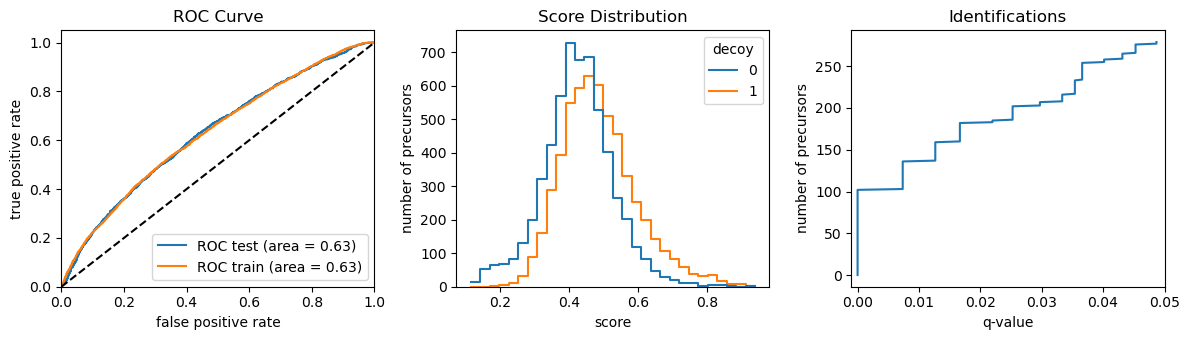

0:01:49.503226  PROGRESS: === checking if recalibration conditions were reached, target 100 precursors ===
0:01:49.503717  PROGRESS: Accumulated precursors: 11,372, 0.01 FDR: 137, 0.001 FDR: 103
0:01:49.504379  INFO: calibration group: precursor, fitting mz estimator 


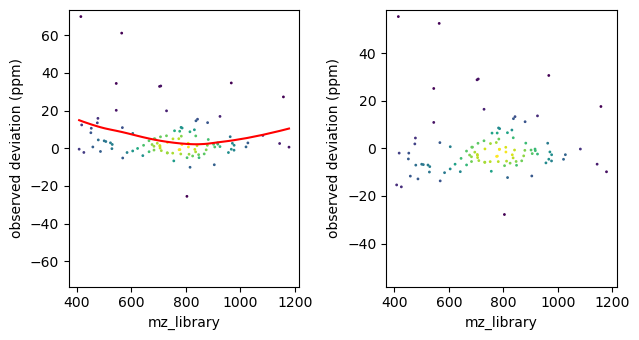

0:01:49.588043  INFO: calibration group: precursor, fitting rt estimator 


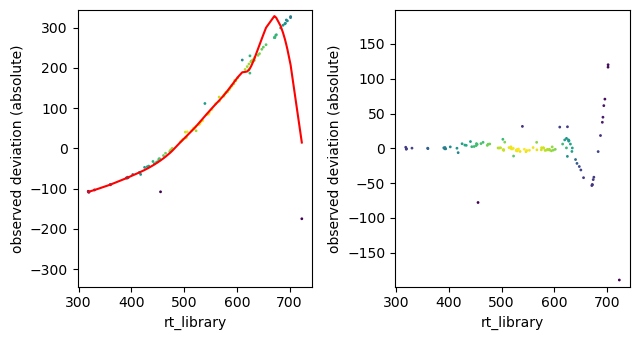

0:01:49.674418  INFO: calibration group: precursor, fitting mobility estimator 


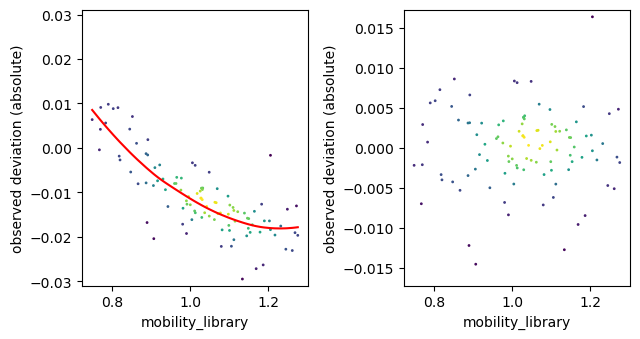

0:01:49.765926  INFO: calibration group: fragment, fitting mz estimator 


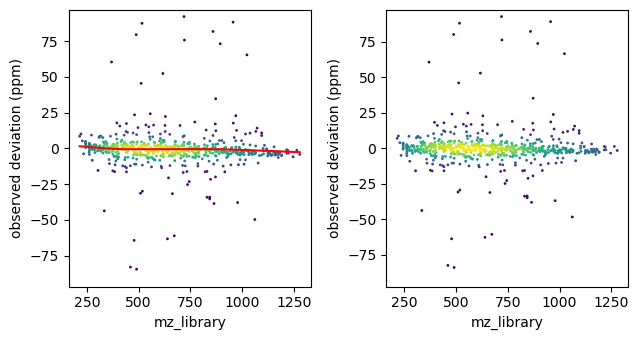

0:01:49.861696  INFO: calibration group: precursor, predicting mz
0:01:49.874883  INFO: calibration group: precursor, predicting rt
0:01:49.906246  INFO: calibration group: precursor, predicting mobility
0:01:49.921983  INFO: calibration group: fragment, predicting mz
0:01:50.039137  PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 2000 ===
0:01:50.043321  PROGRESS: MS1 error: 22.101926181755964, MS2 error: 22.74520229216556, RT error: 59.191344224473, Mobility error: 0.02
0:01:50.043845  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
0:01:50.044175  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:01:50.044420  INFO: Expected peak length in RT is 8.00 seconds, sigma is 0.96
0:01:50.044856  INFO: Expected peak length in mobility is 0.02 1/K_0, sigma is 5.16
100%|██████████| 1981/1981 [00:04<00:00, 486.65it/s] 
0:01:54.369961  INFO: Extracted candidates for 1898 target precursors (95.81%)
0:01:54.370363  INFO: Extracted candidates for 1866

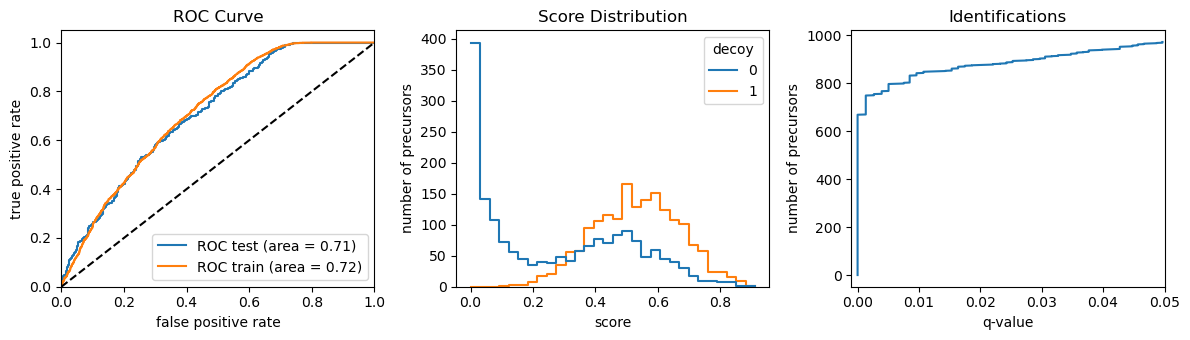

0:02:14.306703  PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:02:14.307300  PROGRESS: Accumulated precursors: 3,561, 0.01 FDR: 842, 0.001 FDR: 669
0:02:14.308354  INFO: calibration group: precursor, fitting mz estimator 


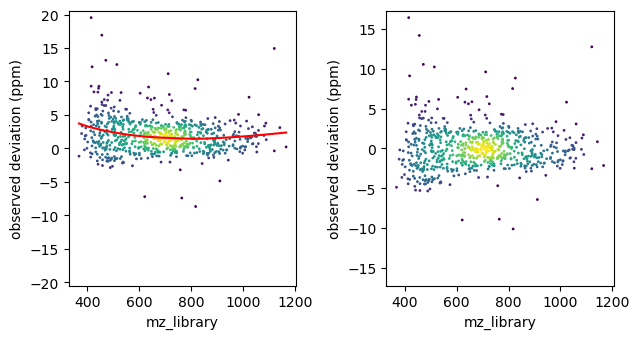

0:02:14.406771  INFO: calibration group: precursor, fitting rt estimator 


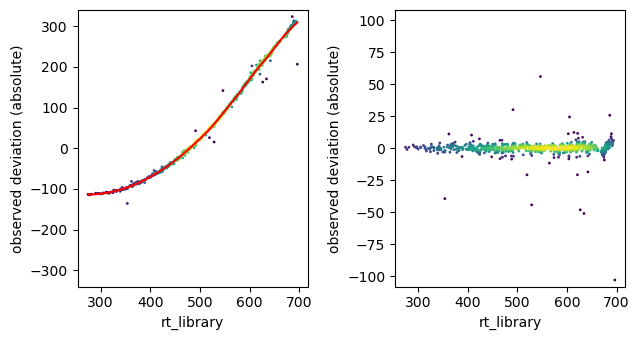

0:02:14.500063  INFO: calibration group: precursor, fitting mobility estimator 


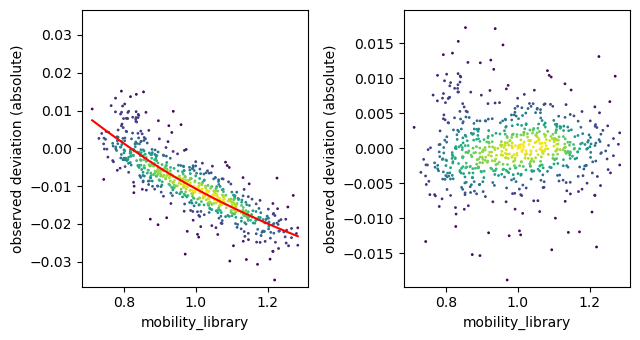

0:02:14.599150  INFO: calibration group: fragment, fitting mz estimator 


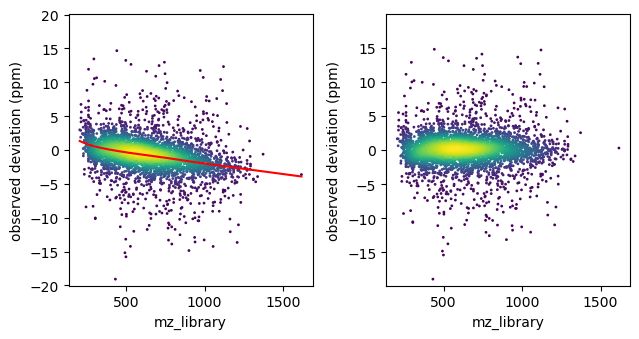

0:02:14.843597  INFO: calibration group: precursor, predicting mz
0:02:14.855344  INFO: calibration group: precursor, predicting rt
0:02:14.886960  INFO: calibration group: precursor, predicting mobility
0:02:14.904176  INFO: calibration group: fragment, predicting mz
0:02:15.011559  INFO: Performing final calibration with all precursors
0:02:15.012180  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.02
0:02:15.012671  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
0:02:15.013100  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:02:15.013497  INFO: Expected peak length in RT is 8.00 seconds, sigma is 0.96
0:02:15.013773  INFO: Expected peak length in mobility is 0.02 1/K_0, sigma is 5.16
100%|██████████| 52792/52792 [00:23<00:00, 2292.03it/s]
0:02:43.392708  INFO: Extracted candidates for 52791 target precursors (100.00%)
0:02:43.393205  INFO: Extracted candidates for 51315 decoy precursors  (99.99%)
100%|██████████| 208203/208

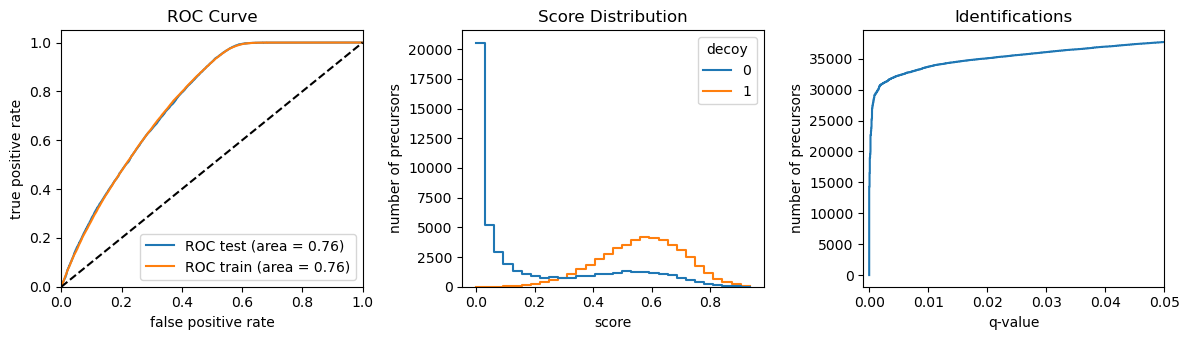

0:04:59.886960  INFO: calibration group: precursor, fitting mz estimator 


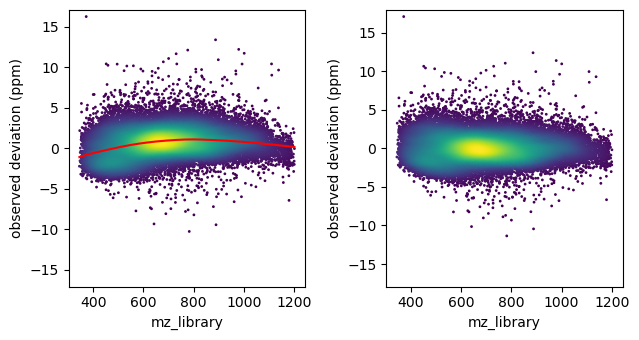

0:05:07.312530  INFO: calibration group: precursor, fitting rt estimator 


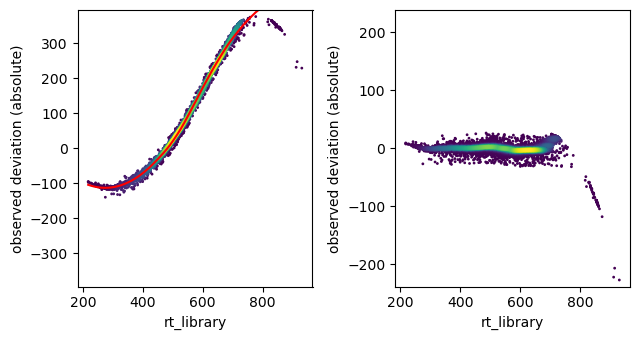

0:05:14.758602  INFO: calibration group: precursor, fitting mobility estimator 


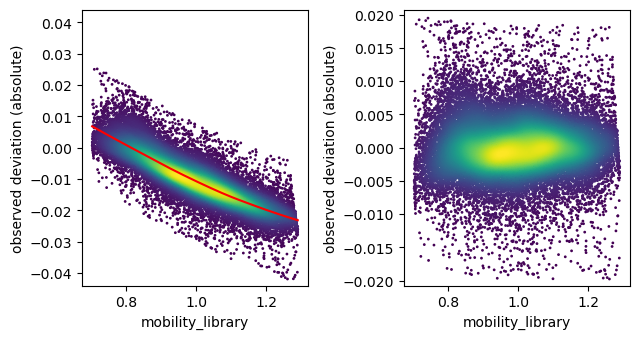

0:05:22.274751  INFO: calibration group: fragment, fitting mz estimator 


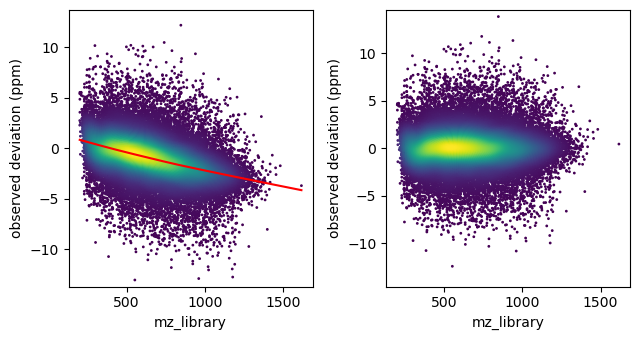

0:05:43.610482  INFO: calibration group: precursor, predicting mz
0:05:43.625010  INFO: calibration group: precursor, predicting rt
0:05:43.658253  INFO: calibration group: precursor, predicting mobility
0:05:43.675566  INFO: calibration group: fragment, predicting mz
0:05:43.794348  INFO: used memory: 25.76 GB
0:05:43.794894  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.02
0:05:43.795436  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
0:05:43.795748  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:05:43.796146  INFO: Expected peak length in RT is 8.00 seconds, sigma is 0.96
0:05:43.796378  INFO: Expected peak length in mobility is 0.02 1/K_0, sigma is 5.16
100%|██████████| 52792/52792 [00:24<00:00, 2186.48it/s]
0:06:13.434172  INFO: Extracted candidates for 51553 target precursors (97.65%)
0:06:13.434667  INFO: Extracted candidates for 50072 decoy precursors  (97.57%)
100%|██████████| 507735/507735 [00:40<00:00, 12390.87it

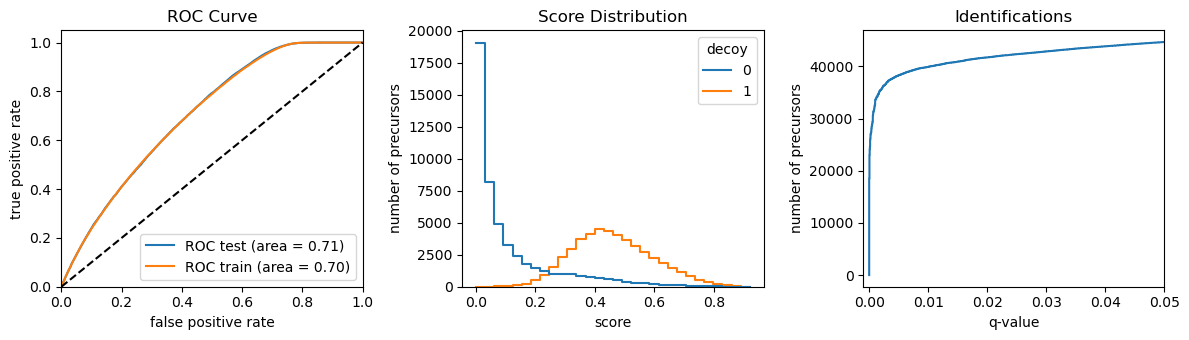

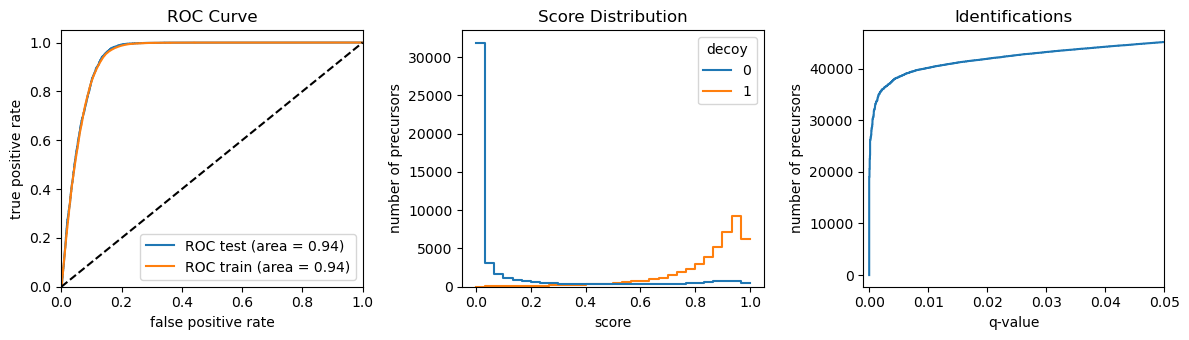

0:11:46.414404  PROGRESS: === extraction finished, 0.05 FDR: 43,009, 0.01 FDR: 39,753, 0.001 FDR: 32,655 ===
0:11:46.424272  INFO: used memory: 24.86 GB


In [6]:
plan = Plan(raw_files)
plan.from_spec_lib_base(test_lib)
plan.run(output_location)

In [5]:
test_lib.precursor_df.columns

Index(['charge', 'decoy', 'frag_start_idx', 'frag_stop_idx',
       'mod_seq_charge_hash', 'mod_seq_hash', 'nAA', 'precursor_mz', 'ccs',
       'elution_group_idx', 'i_0', 'i_1', 'i_2', 'i_3', 'i_4', 'i_5',
       'mobility', 'mod_sites', 'mods', 'precursor_idx', 'proteins',
       'raw_name', 'rt_norm', 'sequence'],
      dtype='object')

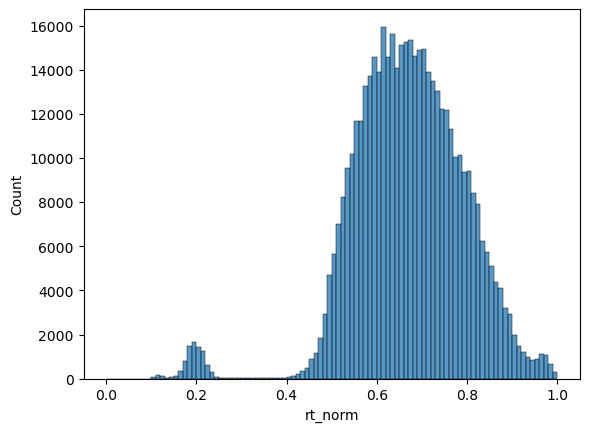

In [4]:
import seaborn as sns
sns.histplot(test_lib.precursor_df['rt_norm'], bins=100)

test_lib.precursor_df = test_lib.precursor_df[test_lib.precursor_df['rt_norm'] >0.4]
test_lib.precursor_df['rt_norm'] = (test_lib.precursor_df['rt_norm'] - 0.4) * 1/0.6

<AxesSubplot:xlabel='rt_norm', ylabel='Count'>

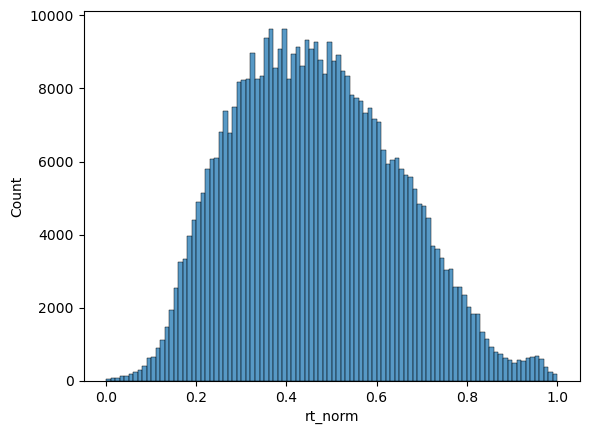

In [5]:
sns.histplot(test_lib.precursor_df['rt_norm'], bins=100)